In [566]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import matplotlib.lines as mlines

<AxesSubplot:>

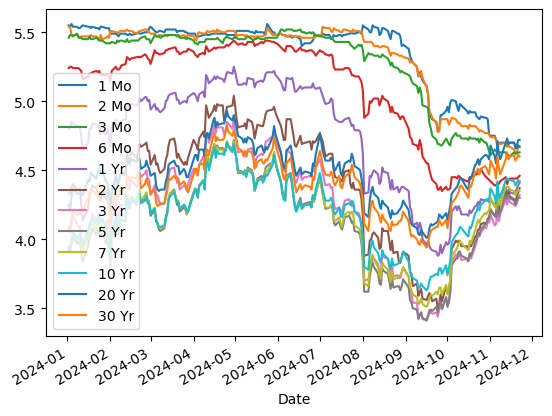

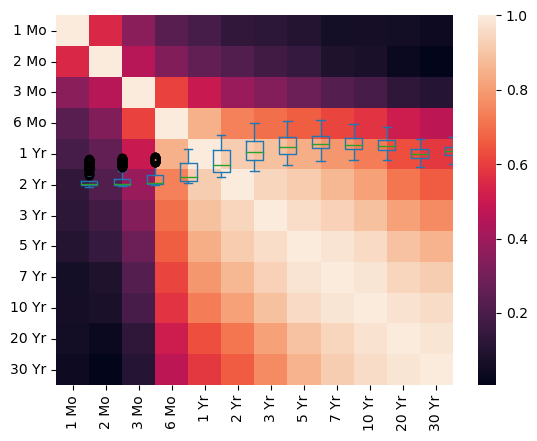

In [549]:
years = [2024]
filenames=[f'treasury_yield/daily-treasury-rates-{year}.csv' for year in years]
yield_data = pd.concat([pd.read_csv(filename) for filename in filenames])
yield_data.drop(['4 Mo'], inplace=True, axis=1, errors='ignore')
yield_data.Date = pd.to_datetime(yield_data.Date)
yield_data.set_index('Date', inplace=True)
yield_data.sort_index(inplace=True)

yield_data.plot()
yield_data.plot.box()
yield_data_changes = yield_data.diff().dropna(axis=0)
sn.heatmap(yield_data_changes.corr())

In [163]:
yield_data_changes = yield_data_changes.apply(lambda x: (x-x.mean()), axis=0)
yield_data = yield_data.apply(lambda x: (x-x.mean()), axis=0)

[9.31328350e-01 6.17813667e-02 5.36489832e-03 6.77975352e-04]


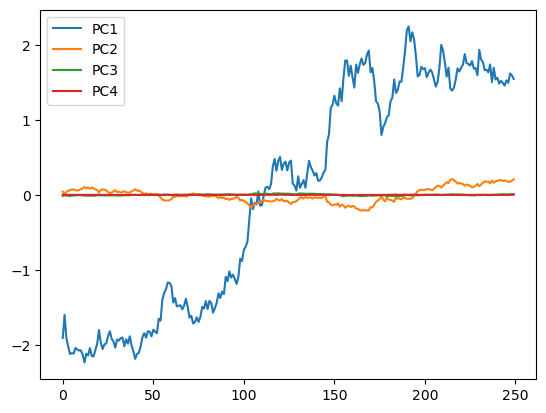

In [168]:
pca = PCA(n_components=4)
pca.fit(yield_data)
print(pca.explained_variance_ratio_)
eigen_values = [np.sqrt(np.dot(component.T, np.dot(yield_data.cov(), component)))for component in pca.components_]
[plt.plot(np.dot(yield_data, component)*eigen_values[i]) for i, component in enumerate(pca.components_)]
plt.legend(['PC1', 'PC2', 'PC3', 'PC4'])
# [plt.plot(component*eigen_values[i]) for i, component in enumerate(pca.components_)]
# plt.legend(['PC1', 'PC2', 'PC3', 'PC4'])
# plt.title('Factor Loadings')

<AxesSubplot:xlabel='Date'>

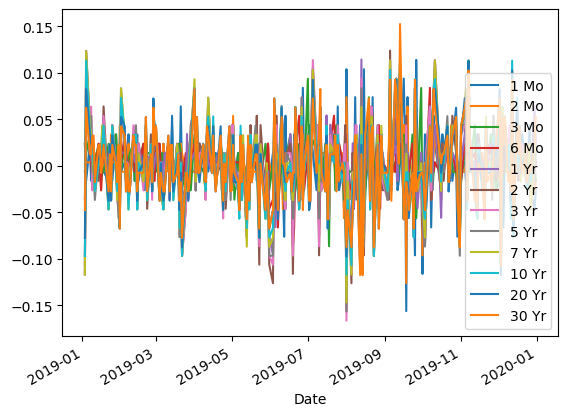

In [175]:
yield_data_changes.plot()


In [628]:
def pca_analysis(data, factors):
    pca = PCA(n_components=3)
    pca.fit(data)
    print(pca.explained_variance_ratio_)
    eigen_values = [np.sqrt(np.dot(component.T, np.dot(data.cov(), component)))for component in pca.components_]
    
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1,3,1)
    [ax1.plot(np.dot(data, component)*eigen_values[i]) for i, component in enumerate(pca.components_)]
    ax1.legend(['PC1', 'PC2', 'PC3', 'PC4'])
    ax1.set_title('Decomposition into PCs')
    ax1.set_xlabel('Days')
    ax1.set_ylabel('Projection on PC')
    
    ax2= fig.add_subplot(1,3,2)
    [ax2.plot(factors,component*np.sqrt(eigen_values[i]), marker='o') for i, component in enumerate(pca.components_)]

    ax2.legend(['PC1', 'PC2', 'PC3', 'PC4'])
    ax2.set_title('Factor Loadings')
    ax2.set_xlabel('Months')
    
    
    ax3 = fig.add_subplot(1,3,3)
    reconstructed_data=pd.DataFrame(np.dot(np.dot(data, pd.DataFrame(pca.components_[:num_components+1]).T), pd.DataFrame(pca.components_[:num_components+1])), columns = factors)
    ax3.plot(reconstructed_data)
    
    return pca.components_

In [480]:
pca.components_

array([[-6.55849795e-03, -2.56122065e-02, -6.46376206e-02,
        -1.09486447e-01, -2.04277933e-01, -3.64923436e-01,
        -3.83073340e-01, -3.91979740e-01, -3.93137390e-01,
        -3.68707835e-01, -3.37837860e-01, -3.21258329e-01],
       [-7.59509889e-01, -5.16274661e-01, -2.78234833e-01,
        -2.06335958e-01, -1.12726163e-01, -5.96715832e-02,
        -8.93629838e-03,  2.69528232e-02,  5.15596531e-02,
         6.69160838e-02,  7.02245153e-02,  8.64535334e-02],
       [ 3.11144222e-01,  9.89654601e-02, -2.53308085e-01,
        -3.29564963e-01, -4.18235590e-01, -3.40767986e-01,
        -2.22298044e-01, -7.48940905e-02,  7.06872918e-02,
         2.21383091e-01,  3.71674786e-01,  4.27081225e-01],
       [ 2.65282296e-01, -5.64993454e-04, -5.99394936e-01,
        -3.91277785e-01, -1.49699958e-01,  3.25229485e-01,
         2.80843486e-01,  1.66614835e-01,  5.68877654e-02,
        -2.47745284e-02, -2.54589740e-01, -3.37296009e-01]])

<AxesSubplot:>

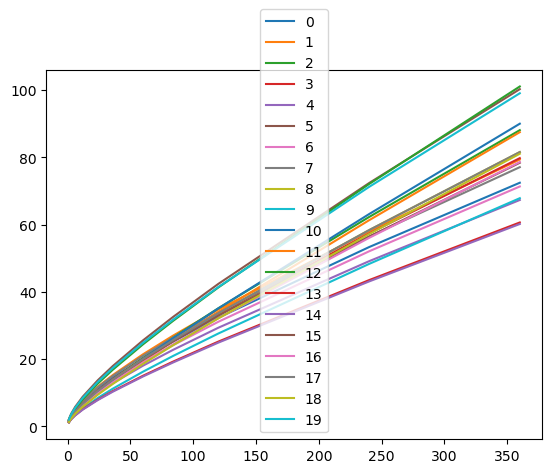

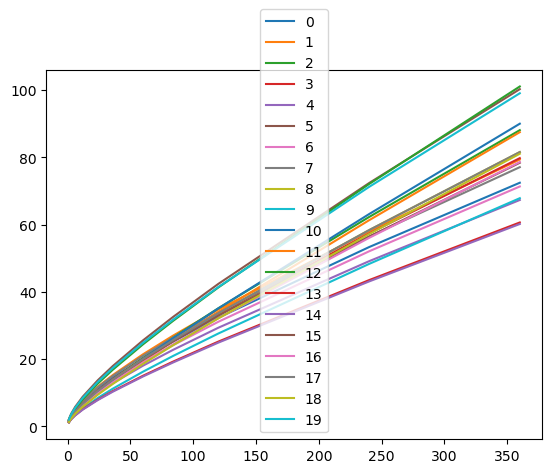

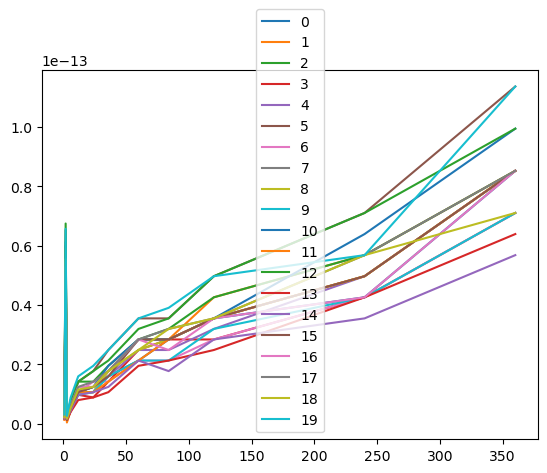

In [501]:
num_components=2
pca = PCA(n_components=num_components)
pca.fit(data)

reconstructed_data=pd.DataFrame(np.dot(np.dot(data, pd.DataFrame(pca.components_[:num_components+1]).T), pd.DataFrame(pca.components_[:num_components+1])), columns = factors)
reconstructed_data.T.plot()
data.T.plot()
(reconstructed_data - data).T.plot()


[0.93132835 0.06178137 0.0053649 ]


array([[-0.2343992 , -0.24294857, -0.25125596, -0.27838448, -0.30931963,
        -0.30981077, -0.30774499, -0.3104941 , -0.31023515, -0.32021571,
        -0.28813703, -0.28429512],
       [-0.46048973, -0.43556283, -0.40861348, -0.30639839, -0.14231132,
         0.1293469 ,  0.20255287,  0.23694381,  0.25066949,  0.23961185,
         0.23326723,  0.16903691],
       [ 0.04988144,  0.1445615 ,  0.13743932, -0.0433453 , -0.3860004 ,
        -0.41775904, -0.35761729, -0.14688758,  0.01361428,  0.20098637,
         0.40448782,  0.52789123]])

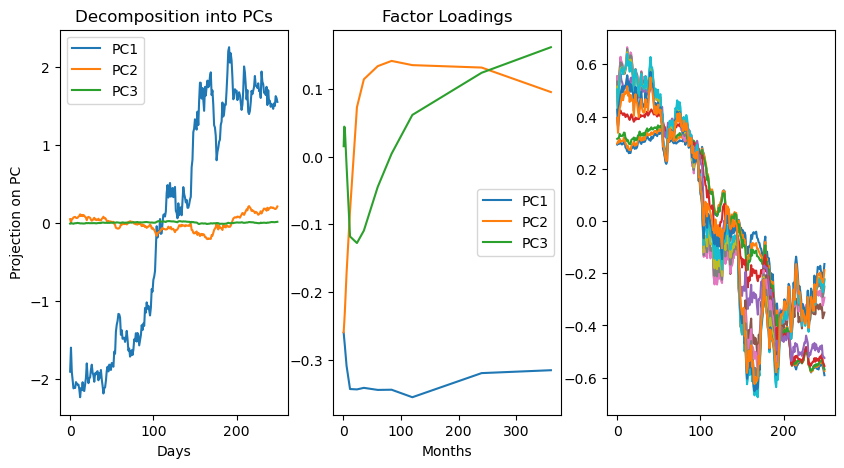

In [505]:
pca_analysis(yield_data)

[0.77916226 0.08284472 0.06131365]


array([[-0.0065585 , -0.02561221, -0.06463762, -0.10948645, -0.20427793,
        -0.36492344, -0.38307334, -0.39197974, -0.39313739, -0.36870784,
        -0.33783786, -0.32125833],
       [-0.75950989, -0.51627466, -0.27823483, -0.20633596, -0.11272616,
        -0.05967158, -0.0089363 ,  0.02695282,  0.05155965,  0.06691608,
         0.07022452,  0.08645353],
       [ 0.31114422,  0.09896546, -0.25330808, -0.32956496, -0.41823559,
        -0.34076799, -0.22229804, -0.07489409,  0.07068729,  0.22138309,
         0.37167479,  0.42708123]])

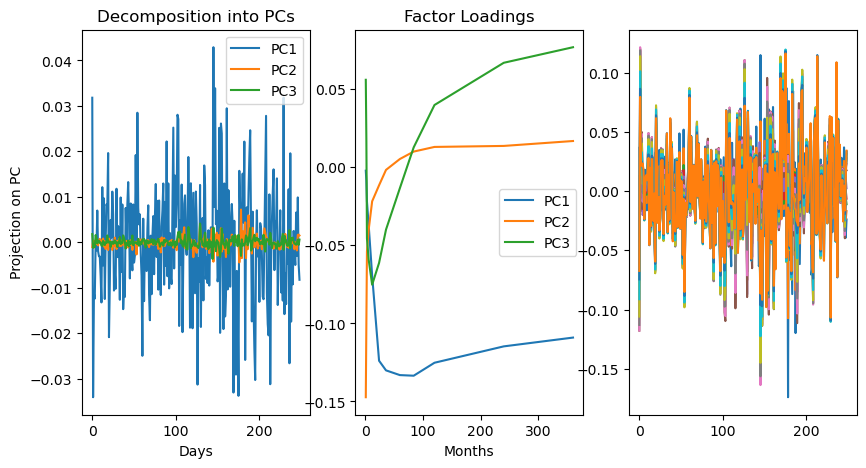

In [506]:
pca_analysis(yield_data_changes)

In [819]:
def data_generator(factors, m, level, slope, curvature):
    df = yield_data[['2 Yr', '3 Yr', '5 Yr']].rename(columns = {'2 Yr': '2Y', '3 Yr': '3Y', '5 Yr': '5Y'}).reset_index(drop=True)
    return df.iloc[:m,:]


     2Y    3Y    5Y
1  0.00 -0.02 -0.03
2  0.05  0.07  0.07
3  0.02  0.03  0.05
4 -0.04 -0.06 -0.05
5  0.00 -0.02  0.00
[0.96371607 0.02868474 0.0075992 ]
[[ 0.55581705  0.59593708  0.57959159]
 [-0.81563831  0.25622176  0.51873361]
 [ 0.16062861 -0.76105808  0.62848154]]


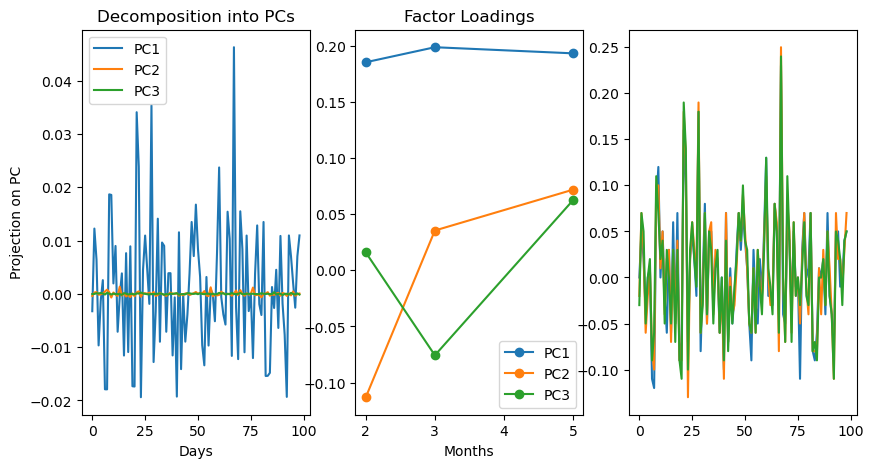

In [820]:
# factors = [1, 2, 3, 6, 12, 24, 36, 60, 84, 120, 240, 360]
factors = [2, 3, 5]
data = data_generator(factors, 100, 1, 1, 0)
print(data.diff().dropna(axis=0).head(5))
# data.diff().head(5).T.plot()
data_diff = data.diff().dropna(axis=0)
# fig = plt.figure()
# ax = plt.axes(projection ='3d')
# ax.plot3D(data_diff.loc[:,'1M'],data_diff.loc[:,'2M'] ,data_diff.loc[:,'3M'], marker='', color='r')
# ax.set_title('yield changes')
# plt.show()



components = pca_analysis(data.diff().dropna(axis=0), factors)
# pca_analysis(data.diff().dropna(axis=0))
# sn.heatmap(data.corr())
print(components)

In [830]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Yield Changes of 2Y, 3Y, 5Y'),
    dcc.Graph(id="graph"),
    html.P("Yield Change:"),
    dcc.RangeSlider(
        id='range-slider',
        min=-0.5, max=0.5, step=0.001,
        marks={-0.5: '-0.5', 0.5: '0.5'},
        value=[-0.5, 0.5]
    ),
])

@app.callback(
    Output("graph", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = data.diff().dropna()# replace with your own data source
    low, high = slider_range
    mask = (df['2Y'] > low) & (df['2Y'] < high)
    # fig = px.scatter_3d(df[mask], x='1M', y='2M', z='3M', hover_data=['1M'])
    components_df = pd.DataFrame([comp * 0.05 * k for comp in components for k in range(10)], columns=['PC1','PC2','PC3'])
    color_column = pd.Series(['PC'+str(i)for i in range(1,4) for k in range(10)])
    components_df['color'] = color_column
    fig = px.line_3d(components_df, x='PC1', y='PC2', z='PC3', color='color', labels={'PC1':'2Y', 'PC2':'3Y', 'PC3':'5Y'})
    [fig.add_trace(px.scatter_3d(df.iloc[[i]], x='2Y', y='3Y', z='5Y').data[0]) for i in range(len(df))]
    return fig

app.run_server(debug=True)

In [766]:
data_diff

,1M,2M,3M
1,-37.431245,-53.228666,-65.199634
2,34.961936,48.893231,59.568006
3,-0.876260,-1.456387,-2.044709
4,-73.607209,-103.403199,-126.266057
5,27.373971,38.601050,47.303378
...,...,...,...
95,42.248123,60.350070,74.288227
96,-56.638202,-79.960786,-97.734319
97,-23.844042,-33.301888,-40.578748
98,4.324751,5.279653,5.900189


In [745]:
data.diff()

,1M,2M,3M
0,NaN,NaN,NaN
1,3.289176,3.673851,4.058525
2,-3.058524,-3.536344,-4.014163
3,3.236612,4.025705,4.814797
4,-2.983358,-3.619314,-4.255271
5,-0.931702,-0.954090,-0.976479
6,3.306687,3.074955,2.843222
7,-0.315392,0.423771,1.162934
8,-0.647754,-0.881453,-1.115152
9,-1.642613,-1.313536,-0.984459


Text(0, 0.5, 'Yield (%)')

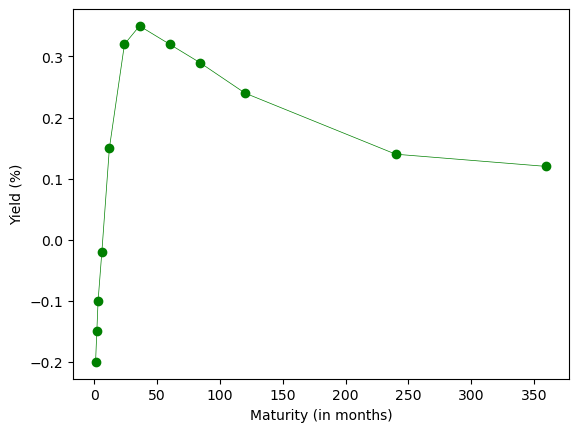

In [555]:
# plt.plot(factors, yield_data.loc['2024-11-21'], marker='o', color='g', linewidth=0.5)
# plt.plot(factors, yield_data.loc['2024-10-21'], marker='o', color='g', linewidth=0.5)
plt.plot(factors, yield_data.loc['2024-11-21']-yield_data.loc['2024-10-21'], marker='o', color='g', linewidth=0.5)


plt.xlabel('Maturity (in months)')
plt.ylabel('Yield (%)')
# plt.title('Yield Curve on 22/11/2024')
# plt.savefig('yield_curve_22nd_Nov.png')

In [595]:
dv01_positions = [1000]*12
np.dot(yield_data_changes, np.transpose(dv01_positions))
pca = PCA(3)
pca.fit(yield_data_changes)
projected_data = np.dot(yield_data_changes,np.transpose(pca.components_))
sensitivities = np.dot(dv01_positions, np.transpose(pca.components_))
np.dot(projected_data, np.transpose(sensitivities)).sum() - np.dot(yield_data_changes, np.transpose(dv01_positions)).sum()

array([ -160.,   510.,   310.,  -320.,   -40.,    90.,  -510.,  -480.,
         770.,   520.,   200.,   200.,  -270.,   110.,   190.,  -390.,
         150.,  -500.,   130.,  -630.,  -830.,  1330.,   980.,  -660.,
         110.,   460.,   180.,   -30.,  1250.,  -420.,  -170.,   470.,
        -240.,   360.,   190.,  -430.,   250.,   160.,  -420.,   -50.,
        -670.,   460.,  -670.,  -100.,  -200.,   -70.,   120.,   550.,
         250.,   690.,   190.,   170.,  -280.,  -390.,    70.,  -450.,
         190.,   -90.,  -270.,   190.,   870.,    60.,  -130.,  -270.,
         650.,   270.,  -440.,  1680.,   -40.,  -470.,   810.,   300.,
        -510.,   420.,  -160.,   -40.,  -210.,   280.,   450.,  -190.,
        -190.,   490.,  -540.,  -460.,  -570.,   -30.,  -130.,   150.,
        -220.,   420.,  -140.,  -270.,  -740.,   310.,   280.,   120.,
        -170.,   160.,   420.,    90.,   290.,   440.,  -440.,  -300.,
        -640.,  -550.,  -350.,   -90.,  1180.,   130.,  -470.,  -580.,
      

In [805]:
df = pd.DataFrame(factors, columns=['maturity'])
print(df)
m=3
data = [[1 + random.uniform(5, 10) +1*(random.uniform(1,2)*df['maturity']) + 1*(random.uniform(1,2)*np.sqrt(df['maturity']))]for i in range(m)]
df = pd.DataFrame(np.array(data).reshape((-1,len(factors))), columns=[str(num)+'M' for num in factors])
df.diff()

   maturity
0         1
1         2
2         3


,1M,2M,3M
0,NaN,NaN,NaN
1,-0.478260,-0.020134,0.435646
2,-0.690771,-1.054973,-1.421874


,2Y,3Y,5Y
0,NaN,NaN,NaN
1,0.00,-0.02,-0.03
2,0.05,0.07,0.07
3,0.02,0.03,0.05
4,-0.04,-0.06,-0.05
...,...,...,...
220,-0.02,-0.02,-0.02
221,-0.02,-0.01,-0.03
222,0.04,0.02,0.03
223,0.03,0.04,0.02


In [816]:
yield_data

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2024-01-02,5.55,5.54,5.46,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
2024-01-03,5.54,5.54,5.48,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2024-01-04,5.56,5.48,5.48,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
2024-01-05,5.54,5.48,5.47,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
2024-01-08,5.54,5.48,5.49,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-18,4.70,4.65,4.63,4.44,4.33,4.29,4.25,4.28,4.35,4.42,4.70,4.61
2024-11-19,4.67,4.63,4.62,4.44,4.34,4.27,4.24,4.25,4.32,4.39,4.66,4.57
2024-11-20,4.68,4.63,4.62,4.44,4.37,4.31,4.26,4.28,4.34,4.41,4.66,4.59
